In [2]:
import numpy as np
import matplotlib.pyplot as plt

from orbit_get_projected import model_orbit
from orbit_get_data import get_data_model, get_data_prior
from orbit_get_prior import prior_transform_ndim12
from orbit_get_likelihood import log_likelihood
from orbit_main import run_in_parallel

In [8]:
dict_data, params_data = get_data_prior(12, seed=2)

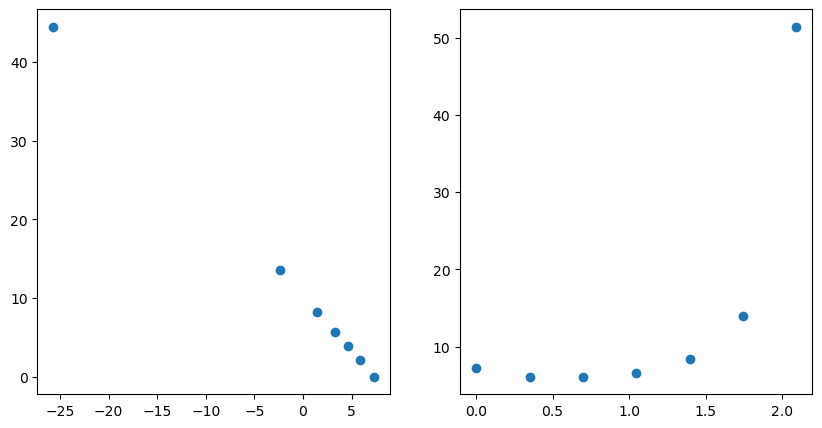

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(dict_data['x'], dict_data['y'])
plt.subplot(1, 2, 2)
plt.scatter(dict_data['theta'], dict_data['r'])


In [ ]:
q_true, seed, ndim, nlive, dir_save, sigma, N = 0.9, 42, 12, 100, './test', 0.1, 1
run_in_parallel(q_true, seed, ndim, nlive, dir_save, sigma, N)

In [4]:
dict_data, params_data = get_data_prior(q_true, ndim, seed=seed, sigma=sigma)
print(log_likelihood(params_data, dict_data))

-2.643044665339107


In [6]:
params = prior_transform_ndim12(np.random.uniform(0, 1, ndim))
print(log_likelihood(params, dict_data))

-700209.287306015


In [14]:
xy_model = model_orbit(params)

xy_model = model_orbit(params)
x_model = xy_model[:,0]
y_model = xy_model[:,1]
r_model = np.sqrt(x_model**2 + y_model**2)
theta_model = np.unwrap( np.arctan2(y_model, x_model) )

from orbit_get_data import CubicSpline_fit
cs = CubicSpline_fit(theta_model, r_model)

In [20]:
np.sum( (cs(dict_data['theta']) - dict_data['r'])**2 / 0.1**2 ) *-0.5

-700209.287306015

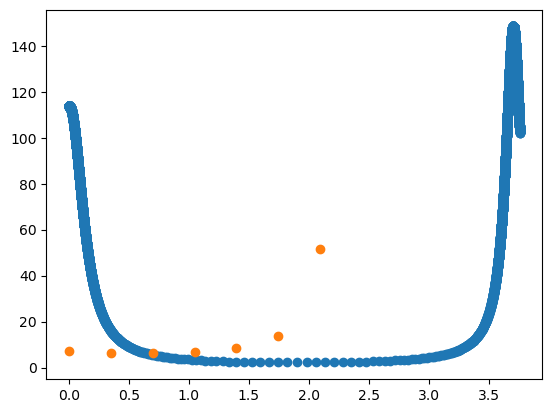

In [13]:
plt.scatter(theta_model, r_model)
plt.scatter(dict_data['theta'], dict_data['r'])